#Convolutional neural network

## Data preparation



In [ ]:
import keras
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from tensorflow.keras import layers
from keras.utils import to_categorical
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from keras import optimizers

In [ ]:
#Creating a list with the name of each class in the dataset
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

4422102/4422102 [==============================] - 0s 0us/step
Sandal


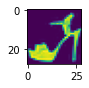

In [ ]:
#Downloading the dataset
dt = tf.keras.datasets.fashion_mnist.load_data()

#Splitting the data into train and test sets
(raw_images, r_labels), (raw_test_images, t_labels) = dt

#Checking the data
fig, ax1 = plt.subplots()
fig.set_size_inches([1,1])
ax1.imshow(raw_images[9])
print(class_names[r_labels[9]])

In [ ]:
#Checking the balance of the classes in the train dataset
df = pd.DataFrame(r_labels)
df.value_counts()

0    6000
1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
dtype: int64

In [ ]:
#Checking the balance of the classes in the test dataset
df = pd.DataFrame(t_labels)
df.value_counts()

0    1000
1    1000
2    1000
3    1000
4    1000
5    1000
6    1000
7    1000
8    1000
9    1000
dtype: int64

The dataset are balanced

In [ ]:
raw_test_images.shape

(10000, 28, 28)

In [ ]:
#transforming labels into categorical format using one-hot encoding
#categorical_crossentropy requires that the labels are one-hot encoded format
#The original labels dataset comes in integer targets format
raw_labels = to_categorical(r_labels)
test_labels = to_categorical(t_labels)

In [ ]:
#Split the raw train dataset into train and validation dataset
raw_train_images, raw_val_images, train_labels, val_labels = train_test_split(raw_images, raw_labels, test_size=0.2, random_state=13)

In [ ]:
#Checking labels format
print(train_labels.shape, val_labels.shape, test_labels.shape)

(48000, 10) (12000, 10) (10000, 10)


In [ ]:
#normalize the train data before training
train_images_n = raw_train_images / 255
test_images_n = raw_test_images / 255
val_images_n = raw_val_images / 255
print(train_images_n.max(), val_images_n.min(), test_images_n.max())

1.0 0.0 1.0


In [ ]:
#Reshape the train data as Keras need 4 dimensions
train_images = train_images_n.reshape(48000,28,28,1)
test_images = test_images_n.reshape(10000,28,28,1)
val_images = val_images_n.reshape(12000,28,28,1)

In [ ]:
#Checking train data format (images)
print(train_images.shape, val_images.shape, test_images.shape)

(48000, 28, 28, 1) (12000, 28, 28, 1) (10000, 28, 28, 1)


##Applying CNN model

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

batch_size = 256
num_classes = 10
epochs = 10

#input image dimensions, in this example the images are 28x28 pixels
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)

#Crearing the CNN model to clasiffy multiclass variable with 10 classes
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)         

In [ ]:
#Fitting the training data into the model and evaluating the accuracy and loss
#using the validation data at the end of each epoch
history = model.fit(train_images, train_labels,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(val_images, val_labels))

Epoch 1/10
188/188 [==============================] - 57s 298ms/step - loss: 0.8552 - accuracy: 0.6808 - val_loss: 0.5156 - val_accuracy: 0.8085
Epoch 2/10
188/188 [==============================] - 56s 298ms/step - loss: 0.5189 - accuracy: 0.8067 - val_loss: 0.4200 - val_accuracy: 0.8486
Epoch 3/10
188/188 [==============================] - 54s 290ms/step - loss: 0.4307 - accuracy: 0.8412 - val_loss: 0.3478 - val_accuracy: 0.8777
Epoch 4/10
188/188 [==============================] - 57s 302ms/step - loss: 0.3869 - accuracy: 0.8576 - val_loss: 0.3253 - val_accuracy: 0.8819
Epoch 5/10
188/188 [==============================] - 53s 285ms/step - loss: 0.3591 - accuracy: 0.8694 - val_loss: 0.3031 - val_accuracy: 0.8884
Epoch 6/10
188/188 [==============================] - 53s 284ms/step - loss: 0.3381 - accuracy: 0.8768 - val_loss: 0.2915 - val_accuracy: 0.8942
Epoch 7/10
188/188 [==============================] - 55s 291ms/step - loss: 0.3187 - accuracy: 0.8832 - val_loss: 0.2869 - val_ac


### Evaluating the results

In [ ]:
#Evaluating the model with the evaluate function and the test data
score = model.evaluate(test_images, test_labels, verbose=0)
print('Test loss: {}'.format(score[0]))
print('Test accuracy: {}'.format(score[1]))

Test loss: 0.2654368281364441
Test accuracy: 0.9041000008583069


In [ ]:
#get the predictions using the test data as inputs
predicted_classes = np.argmax(model.predict(test_images), axis=-1)

#get classification report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(t_labels, predicted_classes, target_names=target_names))

313/313 [==============================] - 4s 14ms/step
              precision    recall  f1-score   support

     Class 0       0.83      0.88      0.85      1000
     Class 1       1.00      0.97      0.98      1000
     Class 2       0.83      0.89      0.86      1000
     Class 3       0.88      0.93      0.91      1000
     Class 4       0.85      0.84      0.85      1000
     Class 5       0.99      0.96      0.98      1000
     Class 6       0.77      0.66      0.71      1000
     Class 7       0.95      0.96      0.95      1000
     Class 8       0.98      0.97      0.98      1000
     Class 9       0.95      0.97      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



### Plotting the results

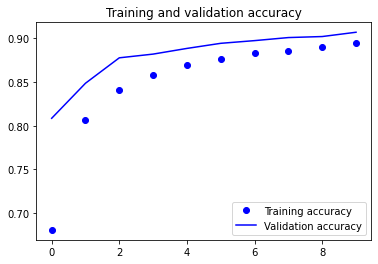

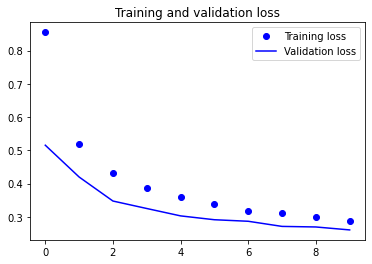

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Making a prediction

Pullover


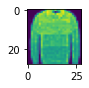

In [ ]:
#Printing the image in the index 20 into the test dataset
fig, ax1 = plt.subplots()
fig.set_size_inches([1,1])
ax1.imshow(raw_test_images[20])
print(class_names[t_labels[20]])

In [ ]:
#Making the predictions on the test_images dataset
predictions = model.predict(test_images)

313/313 [==============================] - 4s 14ms/step


In [ ]:
#Predicting the class of the image in the index 20 in the predictions dataset
class_names[np.argmax(predictions[20])]

'Pullover'

#References

*   MRINALWALIA, (2022), Keras.Conv2D Class at: https://www.geeksforgeeks.org/keras-conv2d-class/ Accessed: 15/12/2022

*   The TensorFlow Authors and RStudio, PBC, (2022), Basic Image Classification at: https://tensorflow.rstudio.com/tutorials/keras/classification accessed: 13/12/2022

*   Aditya Sharma, (2017), Convolutional Neural Networks in Python with Keras at: https://www.datacamp.com/tutorial/convolutional-neural-networks-python accessed:10/12/2022

*   BGO (2018), CNN with Keras at: https://www.kaggle.com/code/bugraokcu/cnn-with-keras accessed: 10/12/2022

*   Keras, (2022), Keras manual, Keras Applications at: https://keras.io/api/applications/#resnet50 Accessed: 10/12/2022

*   ARUNKUMAR VENKATARAMANAN, (2018), Awesome CV with Fashion MNIST Classification at: https://www.kaggle.com/code/surajyathinatti/transfer-learning-confusion-matrix-class-report accessed: 02/12/2022


*   CHIRAG GOYAL, (2021), Demystifying the Difference Between Multi-Class and Multi-Label Classification Problem Statements in Deep Learning at: https://www.analyticsvidhya.com/blog/2021/07/demystifying-the-difference-between-multi-class-and-multi-label-classification-problem-statements-in-deep-learning/ accessed: 04/12/2022


*   KUTUB KAPADIA, (2022), Fashion MNIST with TensorFlow at: https://www.kaggle.com/code/kutubkapadia/fashion-mnist-with-tensorflow accessed: 07/12/2022

*   krispective, (2021), Multi-Class Image Classification using transfer learning with deep convolutional neural networks at: https://medium.com/analytics-vidhya/multi-class-image-classification-using-transfer-learning-with-deep-convolutional-neural-networks-eab051cde3fb accessed: 01/12/2022

*   Christian Versloot, (2022), how-to-use-sparse-categorical-crossentropy-in-keras.md [GitHub]. 15 February. Available at: https://github.com/christianversloot/machine-learning-articles/blob/main/how-to-use-sparse-categorical-crossentropy-in-keras.md accessed: 22/11/2022

*   Keras, (2022), Keras manual, Image classification from scratch
 at: https://keras.io/examples/vision/image_classification_from_scratch/ Accessed: 10/12/2022